# ⚙️ **DATA IMPORT**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import geopandas as gpd
import geoviews as gv
import numpy as np


DATA_PATH = '../data'

POI_FILENAME = 'POI_tourist_establishments.csv'
SITE_FILENAME = 'POI_touristic_sites_by_municipality.csv'
SALARY_FILENAME = 'average_salary_by_municipality.csv'
GEOREF_FILENAME = 'geographical_referential.csv'
STOCK_FILENAME = 'housing_stock.csv'
SALES_FILENAME = 'notary_real_estate_sales.csv'
POPULATION_FILENAME = 'population_by_municipality.csv'
POVERTY_FILENAME = 'poverty_population_by_municipality.csv'
REAL_ESTATE_FILENAME = 'real_estate_info_by_municipality.csv'
FRANCE_DEPARTMENT = 'departements-version-simplifiee.geojson'

poi_df = pd.read_csv(os.path.join(DATA_PATH, POI_FILENAME),usecols=lambda column: column != 'name')
site_df = pd.read_csv(os.path.join(DATA_PATH, SITE_FILENAME))
salary_df = pd.read_csv(os.path.join(DATA_PATH, SALARY_FILENAME),usecols=lambda column: column != 'country_code')
georef_df = pd.read_csv(os.path.join(DATA_PATH, GEOREF_FILENAME),usecols=lambda column: column != 'country_code')
stock_df = pd.read_csv(os.path.join(DATA_PATH, STOCK_FILENAME),usecols=lambda column: column not in ['int64_field_0', 'country_code'])
sales_df = pd.read_csv(os.path.join(DATA_PATH, SALES_FILENAME))
population_df = pd.read_csv(os.path.join(DATA_PATH, POPULATION_FILENAME),usecols=lambda column: column != 'country_code')
poverty_df = pd.read_csv(os.path.join(DATA_PATH, POVERTY_FILENAME),usecols=lambda column: column != 'country_code')
real_estate_df = pd.read_csv(os.path.join(DATA_PATH, REAL_ESTATE_FILENAME))
file_path_json = os.path.join(DATA_PATH, FRANCE_DEPARTMENT)

In [3]:
#checker si on trouve bien le fichier json
file_path_json = os.path.join(DATA_PATH, FRANCE_DEPARTMENT)

if not os.path.exists(file_path_json):
    raise FileNotFoundError(f"File not found: {file_path_json}")
else:
    print(f"File found: {file_path_json}")

File found: ../data\departements-version-simplifiee.geojson


# 🔭 **DATA EXPLORATION**




#### DF POI

In [3]:
poi_df.head() #DATA CLEAN
# importance : poids interne pour évaluer l'importance

,poi,latitude,longitude,municipality_code,importance,name_reprocessed
0,hotel,45.678531,-1.163635,17225,0.078556,Club Med
1,hotel,44.026859,4.847491,84129,0.078419,Cabanes des Grands Cépages
2,hotel,50.331541,1.565677,80333,0.077999,Pierre et Vacances
3,hotel,43.285936,6.569696,83068,0.077702,Pierre & Vacances
4,hotel,43.541050,3.752852,34095,0.077542,Le Domaine du Golf


In [4]:
poi_df

,poi,latitude,longitude,municipality_code,importance,name_reprocessed
0,hotel,45.678531,-1.163635,17225,0.078556,Club Med
1,hotel,44.026859,4.847491,84129,0.078419,Cabanes des Grands Cépages
2,hotel,50.331541,1.565677,80333,0.077999,Pierre et Vacances
3,hotel,43.285936,6.569696,83068,0.077702,Pierre & Vacances
4,hotel,43.541050,3.752852,34095,0.077542,Le Domaine du Golf
...,...,...,...,...,...,...
26211,camp_site,45.701000,2.041247,19164,0.040000,Camping municipal
26212,camp_site,46.491559,3.020672,03238,0.040000,Camping municipal
26213,camp_site,45.694389,2.120544,19241,0.040000,Camping municipal
26214,camp_site,45.915488,2.487122,23131,0.040000,Camping municipal


In [5]:
# 0 DOUBLONS !
poi_df.duplicated().sum()#.drop_duplicates()

np.int64(0)

In [6]:
poi_df.info()
poi_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26216 entries, 0 to 26215
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   poi                26216 non-null  object 
 1   latitude           26216 non-null  float64
 2   longitude          26216 non-null  float64
 3   municipality_code  26216 non-null  object 
 4   importance         26216 non-null  float64
 5   name_reprocessed   26216 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.2+ MB


poi                  0
latitude             0
longitude            0
municipality_code    0
importance           0
name_reprocessed     0
dtype: int64

#### DF SITE

In [7]:
site_df.head() # DATA CLEAN
# importance : poids interne pour évaluer l'importance

,poi,name,latitude,longitude,municipality_code,importance,name_reprocessed
0,1,Fortifications de Vauban (Patrimoine mondial),46.396160,1.472600,36134,0.139527,Fortifications de Vauban
1,1,Chemins de Saint-Jacques-de-Compostelle en Fra...,46.313695,1.478772,23258,0.137821,Chemins de Saint-Jacques-de-Compostelle en Fra...
2,1,Canal du Midi (Patrimoine mondial),43.332709,3.219890,34032,0.129531,Canal du Midi
3,1,Bassin minier du Nord-Pas de Calais (Patrimoin...,50.455895,2.965034,62427,0.127170,Bassin minier du Nord-Pas de Calais
4,1,"Les Causses et les Cévennes, paysage culturel ...",44.346210,3.613406,48050,0.124981,"Les Causses et les Cévennes, paysage culturel ..."


In [8]:
# 0 DOUBLONS !
site_df.duplicated().sum()#.drop_duplicates()

np.int64(0)

In [9]:
import re

site_df['type'] = site_df['name'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else '')
site_df

,poi,name,latitude,longitude,municipality_code,importance,name_reprocessed,type
0,1,Fortifications de Vauban (Patrimoine mondial),46.396160,1.472600,36134,0.139527,Fortifications de Vauban,Patrimoine mondial
1,1,Chemins de Saint-Jacques-de-Compostelle en Fra...,46.313695,1.478772,23258,0.137821,Chemins de Saint-Jacques-de-Compostelle en Fra...,Patrimoine mondial
2,1,Canal du Midi (Patrimoine mondial),43.332709,3.219890,34032,0.129531,Canal du Midi,Patrimoine mondial
3,1,Bassin minier du Nord-Pas de Calais (Patrimoin...,50.455895,2.965034,62427,0.127170,Bassin minier du Nord-Pas de Calais,Patrimoine mondial
4,1,"Les Causses et les Cévennes, paysage culturel ...",44.346210,3.613406,48050,0.124981,"Les Causses et les Cévennes, paysage culturel ...",Patrimoine mondial
...,...,...,...,...,...,...,...,...
31029,viewpoint,Tour Eiffel 3e étage (Point de vue),48.858262,2.294497,75056,0.053782,Tour Eiffel 3e étage,Point de vue
31030,theme_park,Jardin d'Acclimatation (Parc à thème),48.878145,2.264686,75056,0.087097,Jardin d'Acclimatation,Parc à thème
31031,theme_park,Foire du Trône (Parc à thème),48.832003,2.404337,75056,0.060000,Foire du Trône,Parc à thème
31032,golf_course,Golf du Bois de Boulogne (Terrain de golf),48.857776,2.232651,75056,0.060073,Golf du Bois de Boulogne,Terrain de golf


In [10]:
site_df.info()
site_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31034 entries, 0 to 31033
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   poi                31034 non-null  object 
 1   name               31034 non-null  object 
 2   latitude           31034 non-null  float64
 3   longitude          31034 non-null  float64
 4   municipality_code  31034 non-null  object 
 5   importance         31034 non-null  float64
 6   name_reprocessed   31034 non-null  object 
 7   type               31034 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


poi                  0
name                 0
latitude             0
longitude            0
municipality_code    0
importance           0
name_reprocessed     0
type                 0
dtype: int64

#### DF SALARY

In [11]:
salary_df.head(
) # DATA CLEAN

,municipality_code,avg_net_salary,year
0,01004,26471.026727,2019
1,01007,26341.353419,2019
2,01014,25897.497842,2019
3,01024,25695.240341,2019
4,01025,26054.712323,2019


In [12]:
# 0 DOUBLONS !
salary_df.duplicated().sum()#.drop_duplicates()

np.int64(0)

In [13]:
salary_df.info()
salary_df.isnull().sum()
print (salary_df["country_code"].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26675 entries, 0 to 26674
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   municipality_code  26675 non-null  object 
 1   avg_net_salary     26675 non-null  float64
 2   year               26675 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 625.3+ KB


KeyError: 'country_code'

#### DF GEO REF

In [ ]:
georef_df.head()

In [ ]:
# 0 DOUBLONS !
georef_df.duplicated().sum()#.drop_duplicates()

In [ ]:
georef_df.info()
georef_df.isnull().sum()

#### DF STOCK

In [ ]:
stock_df.head() #il va falloir drop la colonne int64_field_0

In [ ]:
# 0 DOUBLONS !
stock_df.duplicated().sum()#.drop_duplicates()

In [ ]:
stock_df.info() # supprimer la colonne int64_field-0
stock_df.isnull().sum()

In [ ]:
stock_df

#### DF SALES

In [ ]:
sales_df.head()

In [ ]:
fig = px.histogram(sales_df, x="sales_price_m2", nbins=20, title="Distribution de sales_price_m2")
fig.show()

In [ ]:
# 510 211 DOUBLONS !
sales_df.duplicated().sum()#.drop_duplicates()

In [ ]:
sales_df.info(), #il manque des latitude et longitude
sales_df.isnull().sum()

#### DF POPULATION

In [ ]:
population_df.head()

In [ ]:
# ??? DOUBLONS !
population_df.duplicated().sum

In [ ]:
population_df.info() #colonne YEAR en format INT64
population_df.isnull().sum()

#### DF POVERTY

In [ ]:
poverty_df.head()

In [ ]:
# 0 DOUBLONS !
poverty_df.duplicated().sum()

In [ ]:
poverty_df.info() # YEAR est en type INT64 et non DATE
poverty_df.isnull().sum()

#### DF REAL ESTATE

In [ ]:
real_estate_df.head()

In [ ]:
# 0 DOUBLONS !
real_estate_df.duplicated().sum()

In [ ]:
real_estate_df.info()
real_estate_df.isnull().sum()

# 🧪 **DATA TRANSFORMATION**

#### CLEANING

In [ ]:
#tri avec les données entre parenthèses de la colonne "name" inclues

import re

site_df['data_inside_parenthesis'] = site_df['name'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else '')
site_df

#suppression de la colonne "name" dans un second temps

site_df.drop(columns=["name"])

#check pour savoir les informations présentes dans la colonne "poi", et si elles correspondent aux valeurs présentes dans la colonne "type"
print (site_df["poi"].value_counts())
print (site_df["data_inside_parenthesis"].value_counts().head(50))

#faire un mapping des colonnes poi, qui sont en fait plus pertinentes que celles de la colonne "type"










In [ ]:
#création d'un dictionnaire intégrant toutes les différentes valeurs inclues dans la colonne "poi"
s = site_df["poi"].value_counts()[site_df["poi"]]
{k: "toto" for k in s.index}

In [ ]:
#création d'un dictionnaire avec les catégories associées aux valeurs de la colonne POI

category_dict = {'zoo': 'Entertainment',
 'dune': 'Nature',
 'park': 'Nature',
 'rock': 'Nature',
 'sand': 'Nature',
 'beach': 'Nature',
 'cliff': 'Nature',
 'islet': 'Nature',
 'ridge': 'Nature',
 'water': 'Nature',
 'wreck': 'Patrimoine',
 'casino': 'Entertainment',
 'castle': 'Patrimoine',
 'cinema': 'Culture',
 'forest': 'Nature',
 'geyser': 'Nature',
 'marina': 'Nature',
 'meadow': 'Nature',
 'museum': 'Culture',
 'valley': 'Nature',
 'theatre': 'Culture',
 'volcano': 'Nature',
 'wetland': 'Nature',
 'heritage': 'Patrimoine',
 'monument': 'Patrimoine',
 'vineyard': 'Nature',
 'viewpoint': 'Nature',
 'waterfall': 'Nature',
 'allotments': 'Patrimoine',
 'attraction': 'Entertainment',
 'theme_park': 'Entertainment',
 'water_park': 'Entertainment',
 'golf_course': 'Entertainment',
 'cave_entrance': 'Culture',
 'national_park': 'Nature',
 'protected_area': 'Nature'}

In [ ]:
#création de la colonne "catégorie"
site_df["Category"] = site_df["poi"].map(category_dict)
site_df

In [ ]:
{'Monument historique': 'patrimoine',
 'Eau': 'aquatique',
 'Musée': 'culture',
 'Forêt': 'toto',
 'Théâtre': 'toto',
 'Château': 'toto',
 'Zone protégée': 'toto',
 'Zone humide': 'toto',
 'Vignoble': 'toto',
 'Terrain de golf': 'toto',
 'Cinéma': 'toto',
 'Parc à thème': 'toto',
 'Falaise': 'toto',
 'Patrimoine mondial': 'toto',
 'Parc aquatique': 'toto',
 'Port de plaisance': 'toto',
 'Plage': 'toto',
 'Vallée': 'toto',
 'Zoo': 'toto',
 'Îlot': 'toto',
 'Volcan': 'toto',
 'Monument': 'toto',
 'Crête': 'toto',
 'Bocage': 'toto',
 'Parc': 'toto',
 'Sable': 'toto',
 'ancien': 'toto',
 'Point de vue': 'toto',
 'Casino': 'toto',
 'ancienne': 'toto',
 'Entrée de grotte': 'toto'}

#### AGGREGATION

In [5]:
#création de tables permettant de scorer le potentiel touristique de chaque département
site_df = site_df.merge (georef_df, on=["municipality_code"])
site_df.head(5)

,poi,name,latitude_x,longitude_x,municipality_code,importance,name_reprocessed,city_name,city_name_normalized,municipality_type,latitude_y,longitude_y,department_code,epci_code,department_name
0,1,Fortifications de Vauban (Patrimoine mondial),46.396160,1.472600,36134,0.139527,Fortifications de Vauban,Mouhet,MOUHET,municipality,46.389251,1.442651,36,200035137.0,Indre
1,1,Chemins de Saint-Jacques-de-Compostelle en Fra...,46.313695,1.478772,23258,0.137821,Chemins de Saint-Jacques-de-Compostelle en Fra...,Vareilles,VAREILLES,municipality,46.305016,1.456031,23,242300135.0,Creuse
2,1,Canal du Midi (Patrimoine mondial),43.332709,3.219890,34032,0.129531,Canal du Midi,Béziers,BEZIERS,municipality,43.347588,3.230768,34,243400769.0,Hérault
3,1,Bassin minier du Nord-Pas de Calais (Patrimoin...,50.455895,2.965034,62427,0.127170,Bassin minier du Nord-Pas de Calais,Hénin-Beaumont,HENIN BEAUMONT,municipality,50.409234,2.958997,62,246200299.0,Pas-de-Calais
4,1,"Les Causses et les Cévennes, paysage culturel ...",44.346210,3.613406,48050,0.124981,"Les Causses et les Cévennes, paysage culturel ...",Bédouès-Cocurès,BEDOUES COCURES,municipality,44.353946,3.619560,48,200069151.0,Lozère


In [6]:
#sélection des colonnes dont on aura besoin pour le calcul
site_df_department = site_df[["poi", "name", "municipality_code", "importance", "name_reprocessed", "department_name"]]
site_df_department

,poi,name,municipality_code,importance,name_reprocessed,department_name
0,1,Fortifications de Vauban (Patrimoine mondial),36134,0.139527,Fortifications de Vauban,Indre
1,1,Chemins de Saint-Jacques-de-Compostelle en Fra...,23258,0.137821,Chemins de Saint-Jacques-de-Compostelle en Fra...,Creuse
2,1,Canal du Midi (Patrimoine mondial),34032,0.129531,Canal du Midi,Hérault
3,1,Bassin minier du Nord-Pas de Calais (Patrimoin...,62427,0.127170,Bassin minier du Nord-Pas de Calais,Pas-de-Calais
4,1,"Les Causses et les Cévennes, paysage culturel ...",48050,0.124981,"Les Causses et les Cévennes, paysage culturel ...",Lozère
...,...,...,...,...,...,...
31019,viewpoint,Tour Eiffel 3e étage (Point de vue),75056,0.053782,Tour Eiffel 3e étage,Paris
31020,theme_park,Jardin d'Acclimatation (Parc à thème),75056,0.087097,Jardin d'Acclimatation,Paris
31021,theme_park,Foire du Trône (Parc à thème),75056,0.060000,Foire du Trône,Paris
31022,golf_course,Golf du Bois de Boulogne (Terrain de golf),75056,0.060073,Golf du Bois de Boulogne,Paris


In [7]:
#groupement par département, puis classement par le département ayant le + d'atouts touristiques
group_site = site_df_department.groupby("department_name")[["importance"]].sum()
group_site
group_site.sort_values("importance", ascending =False)

,importance
department_name,
Gironde,52.539958
Bouches-du-Rhône,47.068588
Finistère,46.685274
Isère,44.230787
Loire-Atlantique,43.525109
...,...
Haute-Marne,7.416165
Val-de-Marne,6.699159
Lozère,6.230406


In [8]:
#même calcul que précédemment, mais pour la partie concernant les logements/lieux de villégiature
poi_df = poi_df.merge (georef_df, on=["municipality_code"])
poi_df.head(5)

,poi,latitude_x,longitude_x,municipality_code,importance,name_reprocessed,city_name,city_name_normalized,municipality_type,latitude_y,longitude_y,department_code,epci_code,department_name
0,hotel,45.678531,-1.163635,17225,0.078556,Club Med,Les Mathes,MATHES,municipality,45.705988,-1.170867,17,241700640.0,Charente-Maritime
1,hotel,44.026859,4.847491,84129,0.078419,Cabanes des Grands Cépages,Sorgues,SORGUES,municipality,44.014576,4.867405,84,248400293.0,Vaucluse
2,hotel,50.331541,1.565677,80333,0.077999,Pierre et Vacances,Fort-Mahon-Plage,FORT MAHON PLAGE,municipality,50.345059,1.577068,80,200070936.0,Somme
3,hotel,43.285936,6.569696,83068,0.077702,Pierre & Vacances,Grimaud,GRIMAUD,municipality,43.282028,6.533032,83,200036077.0,Var
4,hotel,43.541050,3.752852,34095,0.077542,Le Domaine du Golf,Fabrègues,FABREGUES,municipality,43.534477,3.771930,34,243400017.0,Hérault


In [9]:
#sélection des colonnes dont on aura besoin pour le calcul
poi_df_department = poi_df[["poi", "municipality_code", "importance", "department_name"]]
poi_df_department

,poi,municipality_code,importance,department_name
0,hotel,17225,0.078556,Charente-Maritime
1,hotel,84129,0.078419,Vaucluse
2,hotel,80333,0.077999,Somme
3,hotel,83068,0.077702,Var
4,hotel,34095,0.077542,Hérault
...,...,...,...,...
26202,camp_site,19164,0.040000,Corrèze
26203,camp_site,03238,0.040000,Allier
26204,camp_site,19241,0.040000,Corrèze
26205,camp_site,23131,0.040000,Creuse


In [10]:
#groupement par département, puis classement par le département ayant le + de logements/lieux de villégiature
group_poi = poi_df_department.groupby("department_name")[["importance"]].sum()
group_poi
group_poi.sort_values("importance", ascending =False)

,importance
department_name,
Paris,70.275305
Savoie,37.401407
Haute-Savoie,35.158395
Hérault,33.793973
Alpes-Maritimes,32.802552
...,...
Eure-et-Loir,3.871754
Haute-Marne,3.670584
Ardennes,3.541133


In [11]:
#ajout des 2 calculs d'importance
department_merged_df = group_poi.merge (group_site, on=["department_name"])
department_merged_df["somme_importance"]=department_merged_df["importance_x"]+department_merged_df["importance_y"]
department_merged_df = department_merged_df.drop(columns=["importance_x", "importance_y"])
department_merged_df
department_merged_df.sort_values("somme_importance", ascending =False)

,somme_importance
department_name,
Paris,110.051777
Gironde,77.287832
Savoie,76.393945
Finistère,75.977072
Bouches-du-Rhône,71.561051
...,...
Aube,13.061510
Seine-Saint-Denis,11.649267
Haute-Marne,11.086749


In [12]:
#cartographie
sf = gpd.read_file(file_path_json)
sf.head()

from geoviews import dim
import hvplot.pandas

# Supposons que 'department_name' dans GeoDataFrame est 'nom'
sf = sf.rename(columns={'nom': 'department_name'})
# Fusionner les deux dataframes sur 'department_name'
merged_dataframe_json = sf.merge(department_merged_df, on='department_name', how='left')

deps = gv.Polygons(merged_dataframe_json)
deps.opts(width=600, height=600, toolbar='above', color=dim('somme_importance'),
          colorbar=True, tools=['hover'], aspect='equal')



:Polygons   [Longitude,Latitude]   (code,department_name,somme_importance)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
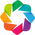

:Polygons   [Longitude,Latitude]   (code,department_name,somme_importance)

In [22]:
import bokeh
gv.extension ("bokeh")
deps

In [16]:
#test version numpy et bokeh
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("geopandas version:", gpd.__version__)
print("geoviews version:", gv.__version__)
print("bokeh version:", bokeh.__version__)

numpy version: 2.0.0
pandas version: 2.2.2
geopandas version: 0.14.4
geoviews version: 1.12.0
bokeh version: 3.4.1


In [17]:
pip install --upgrade numpy pandas geopandas geoviews bokeh


Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (3209003490.py, line 1)

# 📈 **DATA VIZUALISATION**